# Código para gráficos de pressão

Vitória Yumi Uetuki Nicoleti

Vitor Eduardo Girotto Barelli

Iniciação à Pesquisa II - Sirus/ CNPEM - MOGNO Beamline

In [1]:
# importando bibliotecas
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# definindo funções
def ler_arquivo_csv(nome_arquivo):
    """Lê arquivo .csv, criando um dataframe a partir dele e realizando alterações necessárias para este caso, além de mostrá-lo.

    Args:
        nome_arquivo: nome do arquivo que se deseja ler, sendo necessário estar na mesma pasta.

    Results:
        df: Dataframe criado a partir do arquivo desejado.
    """

    df = pd.read_csv(nome_arquivo)
    df = df.iloc[:-1] # retira um outlier
    df = df.dropna()
    df.rename(columns={' Pressure(PSI)': 'Pressure(PSI)'}, inplace = True)
    display(df)
    
    return df

def grafico_pressao(nome_arquivo):
    """Lê o arquivo .csv desejado, mostra-o, plota um gráfico original a partir dele, permite fazer um zoom, caso desejado, e salva as imagens obtidas.

    Args:
        nome_arquivo: nome do arquivo .csv que se quer analisar.

    Results:
        Plotagem do último gráfico modificado.
    """
    # printa nome do arquivo
    print(f"Arquivo - {nome_arquivo}")

    #aplica a função ler_arquivo_csv para o arquivo desejado
    df = ler_arquivo_csv(nome_arquivo)

    # plota um gráfico de pressão pelo tempo a partir dos dados do dataframe 
    df.plot("Time(s)", "Pressure(PSI)")
    
    # Define data e hora para os rótulos dos eixos e título, com base no nome do arquivo, seguindo um modelo:
    # data = xx xx xx 
    # que corresponde a: dia mês ano
    data = str(nome_arquivo[15]) + str(nome_arquivo[16]) + " " + str(nome_arquivo[12]) + str(nome_arquivo[13]) + " " + str(nome_arquivo[9]) + str(nome_arquivo[10])
    # hora = xxhxxmxxs
    # que corresponde a: horahminutosmsegundossw
    hora = str(nome_arquivo[19]) + str(nome_arquivo[20]) + str(nome_arquivo[21]) + str(nome_arquivo[23]) + str(nome_arquivo[24]) + str(nome_arquivo[25]) + str(nome_arquivo[27]) + str(nome_arquivo[28]) + str(nome_arquivo[29])

    titulo = "Gráfico - "+ data + " " + hora # define título do gráfico
    plt.title(titulo) #atribui-o ao gráfico a ser plotado
    plt.xlabel("Tempo (s)") # define o rótulo do eixo x
    plt.ylabel("Pressão (PSI)") # define o rótulo do eixo y
    
    # salva o gráfico
    plt.savefig(titulo, dpi=300)
    
    # Exibe o gráfico
    plt.show()

    # Questionário para zoom no gráfico em algum intervalo de tempo desejado
    print("Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)")
    rzoom = input()

    # Caso não respondam com sim ou não, é dado um aviso e permite responder novamente
    while rzoom.lower() not in ["sim", "não", "nao"]:
        print("Responda corretamente:")
        rzoom = input()

    # Caso a resposta seja não
    if rzoom.lower() == "não" or "nao": # .lower() usado para padronizar o modo da resposta dada, para tornar todas as letras minúsculas e evitar problemas
        pass

    # Caso a resposta seja sim
    elif rzoom.lower() == "sim": # .lower() usado para padronizar o modo da resposta dada, para tornar todas as letras minúsculas
        
        dar_zoom = True
        
        while dar_zoom == True:
        
            # Perguntas sobre o intervalo para o zoom desejado
            print("Considerar dados a partir de qual valor de Time(s) do gráfico?")
            ZOOM_c = int(input())
            print("Considerar dados até qual valor de Time(s) do gráfico?")
            ZOOM_t = int(input())

            # Zoom
            logic_c = df["Time(s)"] >= ZOOM_c
            df = df.loc[logic_c]
            logic_t = df["Time(s)"] <= ZOOM_t
            df = df.loc[logic_t]

            # Plota o gráfico após ter sido dado o zoom:
            print("Zoom:")
            df.plot("Time(s)", "Pressure(PSI)")
            plt.title(titulo)
            
            # Salva a imagem da última edição do gráfico
            plt.savefig(titulo, dpi=300) 
            
            plt.show()

            # Caso o resultado tenha sido indesejado, permite que seja refeito o zoom
            print("Caso queira refazer o corte, responda 'Refazer'; Caso já esteja satisfeito(a), responda 'Prosseguir'")
            zoom = input()
            
            while zoom.lower() not in ["refazer", "prosseguir"]:
                print("Responda corretamente:")
                rzoom = input()
            
            if zoom.lower() == "refazer":
                dar_zoom = True
                
            elif zoom.lower() == "prosseguir":
                dar_zoom = False   
        
    return plt.show()

Arquivo - Pressure-19-06-27--00h-13m-06s.csv


,Time(s),Pressure(PSI)
0,0.0,14.2396
1,1.0,14.2771
2,2.0,14.2284
3,3.0,14.2308
4,4.0,14.2689
...,...,...
8913,8913.0,26.9007
8914,8914.0,26.9654
8915,8915.0,26.8711
8916,8916.0,26.9732


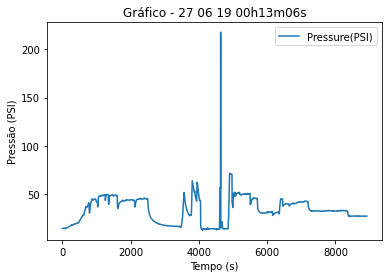

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-06-27--12h-12m-34s.csv


,Time(s),Pressure(PSI)
0,0.0,14.2440
1,1.0,14.2144
2,2.0,14.2132
3,3.0,14.2537
4,4.0,14.1967
...,...,...
1128,1128.0,16.4367
1129,1129.0,16.2557
1130,1130.0,16.1880
1131,1131.0,16.1024


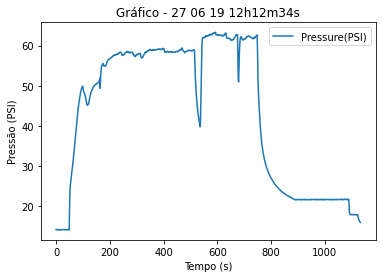

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-06-27--12h-31m-32s.csv


,Time(s),Pressure(PSI)
0,0.0,15.6561
1,1.0,15.6076
2,2.0,15.5341
3,3.0,15.4981
4,4.0,15.4776
...,...,...
1155,1155.0,17.6471
1156,1156.0,17.6479
1157,1157.0,17.6747
1158,1158.0,17.6335


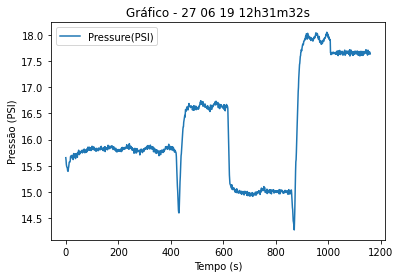

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-06-27--15h-29m-47s.csv


,Time(s),Pressure(PSI)
0,0.0,15.9284
1,1.0,15.9753
2,2.0,15.8848
3,3.0,15.9380
4,4.0,15.9535
...,...,...
110,110.0,13.7692
111,111.0,13.7801
112,112.0,13.7513
113,113.0,13.7940


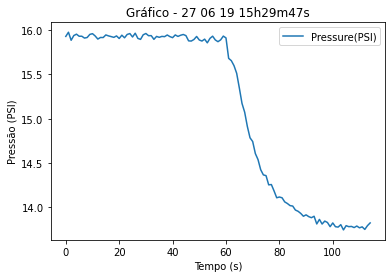

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-06-27--15h-31m-45s.csv


,Time(s),Pressure(PSI)
0,0.0,13.8056
1,1.0,13.8199
2,2.0,13.8533
3,3.0,13.8766
4,4.0,13.8879
...,...,...
5625,5625.0,14.4213
5626,5626.0,14.4433
5627,5627.0,14.4402
5628,5628.0,14.4385


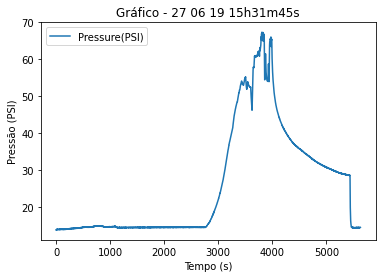

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-06-27--19h-26m-25s.csv


,Time(s),Pressure(PSI)
0,0.0,14.2799
1,1.0,14.3746
2,2.0,14.3880
3,3.0,14.3429
4,4.0,14.3540
...,...,...
4254,4254.0,14.4726
4255,4255.0,14.4330
4256,4256.0,14.4297
4257,4257.0,14.3825


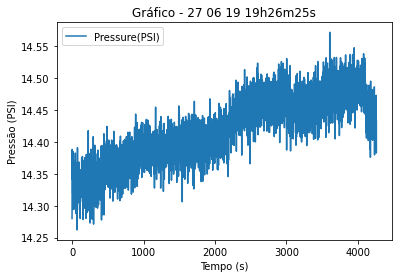

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-06-27--20h-37m-28s.csv


,Time(s),Pressure(PSI)
0,0.0,14.4357
1,1.0,14.4538
2,2.0,14.4207
3,3.0,14.4528
4,4.0,14.4814
...,...,...
1372,1372.0,14.2113
1373,1373.0,14.2710
1374,1374.0,14.2518
1375,1375.0,14.2364


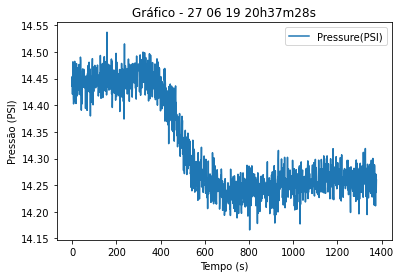

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-06-27--22h-08m-18s.csv


,Time(s),Pressure(PSI)
0,0.0,14.3615
1,1.0,14.3953
2,2.0,14.4050
3,3.0,14.3836
4,4.0,14.3743
...,...,...
6930,6930.0,14.5807
6931,6931.0,14.5726
6932,6932.0,14.6064
6933,6933.0,14.5827


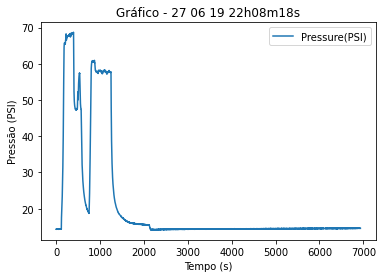

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-06-28--00h-51m-34s.csv


,Time(s),Pressure(PSI)
0,0.0,14.7324
1,1.0,14.6971
2,2.0,14.6908
3,3.0,14.7482
4,4.0,14.7149
...,...,...
2325,2325.0,14.1605
2326,2326.0,14.1435
2327,2327.0,14.1470
2328,2328.0,14.1586


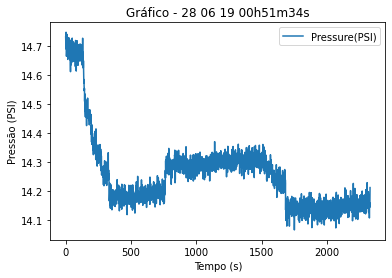

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-06-28--02h-58m-57s.csv


,Time(s),Pressure(PSI)
0,0.0,14.2833
1,1.0,14.3009
2,2.0,14.2720
3,3.0,14.3077
4,4.0,14.2939
...,...,...
9758,9758.0,14.1323
9759,9759.0,14.1892
9760,9760.0,14.1194
9761,9761.0,14.1256


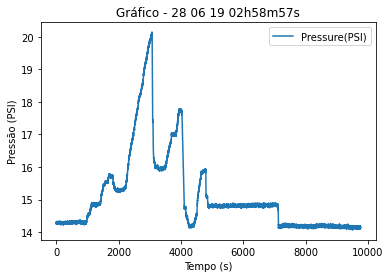

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-06-28--05h-59m-00s.csv


,Time(s),Pressure(PSI)
0,0.0,23.5457
1,1.0,23.7927
2,2.0,24.0471
3,3.0,24.2934
4,4.0,24.5886
...,...,...
250,250.0,57.0089
251,251.0,57.0273
252,252.0,57.0618
253,253.0,57.0177


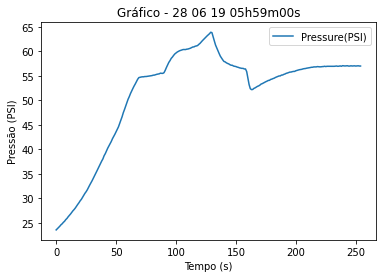

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-06-28--06h-04m-00s.csv


,Time(s),Pressure(PSI)
0,0.0,57.2586
1,1.0,57.2499
2,2.0,57.2571
3,3.0,57.2556
4,4.0,57.3301
...,...,...
1296,1296.0,14.4322
1297,1297.0,14.4029
1298,1298.0,14.4627
1299,1299.0,14.4056


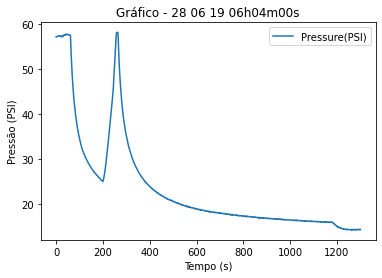

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-06-28--07h-44m-07s.csv


,Time(s),Pressure(PSI)
0,0.0,14.6037
1,1.0,14.6377
2,2.0,14.6320
3,3.0,14.6700
4,4.0,14.6296
...,...,...
2541,2541.0,14.3503
2542,2542.0,14.3708
2543,2543.0,14.3713
2544,2544.0,14.3649


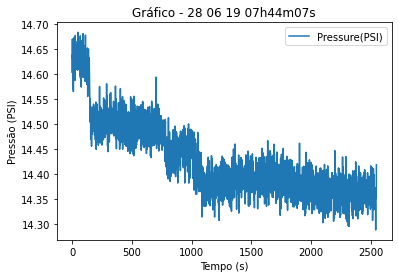

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-06-28--09h-16m-00s.csv


,Time(s),Pressure(PSI)
0,0.0,14.4239
1,1.0,14.4775
2,2.0,14.4452
3,3.0,14.4956
4,4.0,14.4495
...,...,...
3021,3021.0,17.9007
3022,3022.0,17.8582
3023,3023.0,17.9411
3024,3024.0,17.8821


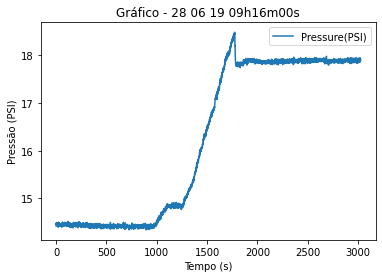

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-06-28--10h-51m-13s.csv


,Time(s),Pressure(PSI)
0,0.0,17.8583
1,1.0,17.6503
2,2.0,17.0315
3,3.0,16.6400
4,4.0,16.4391
...,...,...
413,413.0,19.4923
414,414.0,19.5415
415,415.0,19.5639
416,416.0,19.5146


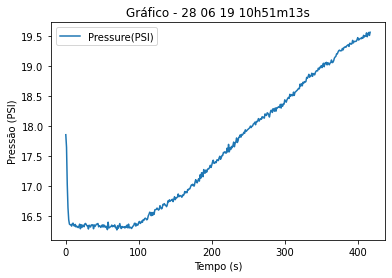

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-06-28--10h-58m-54s.csv


,Time(s),Pressure(PSI)
0,0.0,19.7960
1,1.0,19.7987
2,2.0,19.7878
3,3.0,19.8502
4,4.0,19.7585
...,...,...
4446,4446.0,18.0789
4447,4447.0,18.0753
4448,4448.0,18.0960
4449,4449.0,18.0800


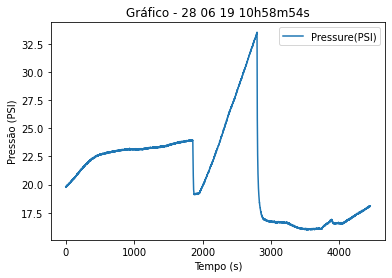

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-06-28--13h-14m-48s.csv


,Time(s),Pressure(PSI)
0,0.0,18.7938
1,1.0,18.8046
2,2.0,18.7710
3,3.0,18.8213
4,4.0,18.7876
...,...,...
21383,21383.0,27.7368
21384,21384.0,27.6406
21385,21385.0,27.6874
21386,21386.0,27.6469


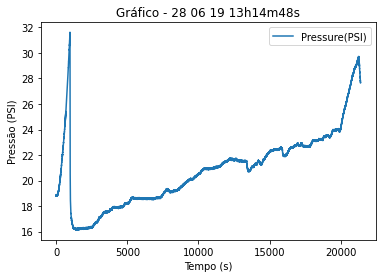

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-07-01--16h-46m-00s.csv


,Time(s),Pressure(PSI)
0,0.0,18.5705
1,1.0,18.5955
2,2.0,18.5638
3,3.0,18.6035
4,4.0,18.5990
...,...,...
183,183.0,14.9972
184,184.0,15.0057
185,185.0,14.9989
186,186.0,15.0458


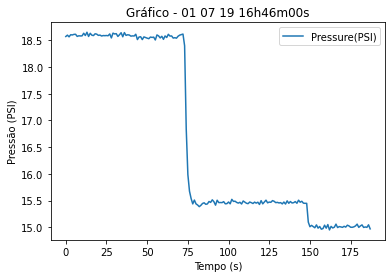

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-07-01--16h-53m-00s.csv


,Time(s),Pressure(PSI)
0,0.0,15.0082
1,1.0,14.9992
2,2.0,15.0670
3,3.0,15.0448
4,4.0,15.0392
...,...,...
58700,58700.0,25.1712
58701,58701.0,25.1939
58702,58702.0,25.2092
58703,58703.0,25.1761


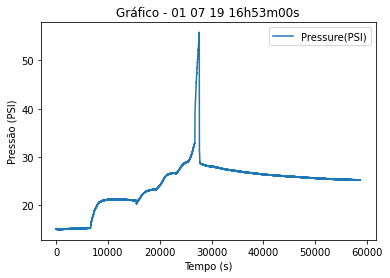

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-07-02--09h-11m-42s.csv


,Time(s),Pressure(PSI)
0,0.0,25.1551
1,1.0,25.1109
2,2.0,25.1971
3,3.0,25.1759
4,4.0,25.1721
...,...,...
23949,23949.0,28.0447
23950,23950.0,28.0315
23951,23951.0,28.0667
23952,23952.0,28.1263


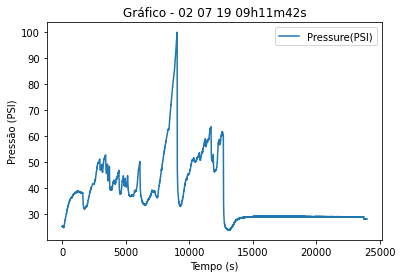

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-07-02--15h-55m-29s.csv


,Time(s),Pressure(PSI)
0,0.0,28.0702
1,1.0,28.1010
2,2.0,28.0551
3,3.0,28.0738
4,4.0,28.0224
...,...,...
525,525.0,36.4900
526,526.0,36.3820
527,527.0,36.2684
528,528.0,36.1549


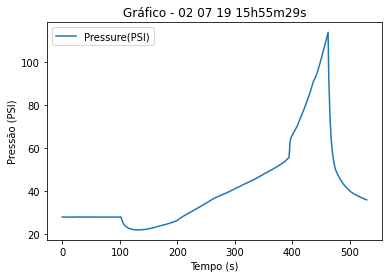

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-07-02--16h-05m-28s.csv


,Time(s),Pressure(PSI)
0,0.0,31.4202
1,1.0,31.3730
2,2.0,31.3921
3,3.0,31.3253
4,4.0,31.2088
...,...,...
345,345.0,27.7484
346,346.0,27.8825
347,347.0,28.0014
348,348.0,28.1860


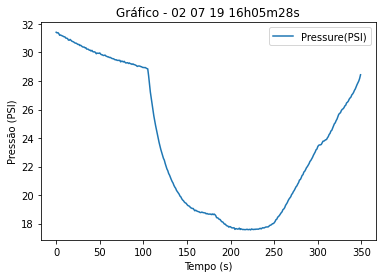

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-07-02--16h-11m-54s.csv


,Time(s),Pressure(PSI)
0,0.0,34.8936
1,1.0,35.0730
2,2.0,35.2820
3,3.0,35.4303
4,4.0,35.5823
...,...,...
12268,12268.0,21.3501
12269,12269.0,21.2181
12270,12270.0,21.1581
12271,12271.0,21.0911


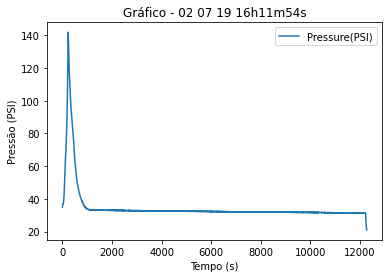

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-07-02--19h-36m-30s.csv


,Time(s),Pressure(PSI)
0,0.0,20.7413
1,1.0,20.6995
2,2.0,20.5865
3,3.0,20.5272
4,4.0,20.4673
...,...,...
11772,11772.0,24.5002
11773,11773.0,24.4445
11774,11774.0,24.3620
11775,11775.0,24.2430


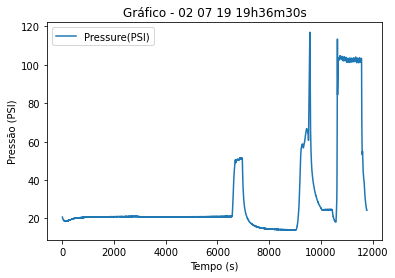

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-07-02--22h-52m-51s.csv


,Time(s),Pressure(PSI)
0,0.0,23.8670
1,1.0,23.8591
2,2.0,23.7530
3,3.0,23.6610
4,4.0,23.6242
...,...,...
3941,3941.0,14.0752
3942,3942.0,14.0853
3943,3943.0,14.1010
3944,3944.0,14.0903


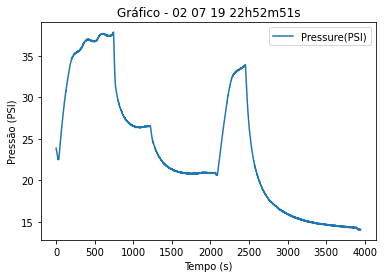

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-07-03--00h-04m-17s.csv


,Time(s),Pressure(PSI)
0,0.0,13.8378
1,1.0,13.8829
2,2.0,13.9211
3,3.0,13.8778
4,4.0,13.8587
5,5.0,13.8876
6,6.0,13.8590
7,7.0,13.8501
8,8.0,13.8991
9,9.0,13.8933


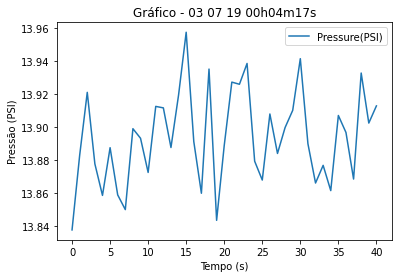

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-07-03--00h-05m-40s.csv


,Time(s),Pressure(PSI)
0,0.0,13.8852
1,1.0,13.8587
2,2.0,13.9296
3,3.0,13.9009
4,4.0,13.8793
...,...,...
528,528.0,18.7838
529,529.0,18.6663
530,530.0,18.5845
531,531.0,18.5859


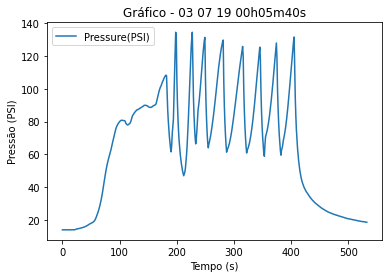

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-07-03--00h-15m-31s.csv


,Time(s),Pressure(PSI)
0,0.0,16.4125
1,1.0,16.4515
2,2.0,16.3987
3,3.0,16.3830
4,4.0,16.3831
...,...,...
3455,3455.0,14.1166
3456,3456.0,14.0705
3457,3457.0,14.0975
3458,3458.0,14.0614


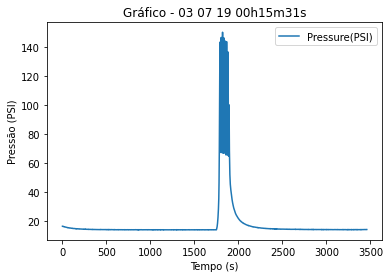

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-07-03--12h-46m-44s.csv


,Time(s),Pressure(PSI)
0,0.0,14.3846
1,1.0,14.4244
2,2.0,14.4087
3,3.0,14.3828
4,4.0,14.4216
...,...,...
13410,13410.0,-49.9537
13411,13411.0,-49.9539
13412,13412.0,-49.9534
13413,13413.0,-49.9535


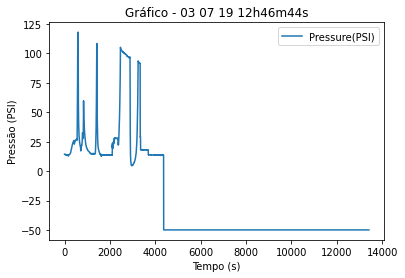

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


In [3]:
# Estabelece uma lista com o nome de todos os arquivos, exceto os inicias apenas de água
injecoes = ["Pressure-19-06-27--00h-13m-06s.csv", "Pressure-19-06-27--12h-12m-34s.csv", "Pressure-19-06-27--12h-31m-32s.csv", "Pressure-19-06-27--15h-29m-47s.csv", "Pressure-19-06-27--15h-31m-45s.csv", "Pressure-19-06-27--19h-26m-25s.csv", "Pressure-19-06-27--20h-37m-28s.csv", "Pressure-19-06-27--22h-08m-18s.csv", "Pressure-19-06-28--00h-51m-34s.csv", "Pressure-19-06-28--02h-58m-57s.csv", "Pressure-19-06-28--05h-59m-00s.csv", "Pressure-19-06-28--06h-04m-00s.csv", "Pressure-19-06-28--07h-44m-07s.csv", "Pressure-19-06-28--09h-16m-00s.csv", "Pressure-19-06-28--10h-51m-13s.csv", "Pressure-19-06-28--10h-58m-54s.csv", "Pressure-19-06-28--13h-14m-48s.csv", "Pressure-19-07-01--16h-46m-00s.csv", "Pressure-19-07-01--16h-53m-00s.csv", "Pressure-19-07-02--09h-11m-42s.csv", "Pressure-19-07-02--15h-55m-29s.csv", "Pressure-19-07-02--16h-05m-28s.csv", "Pressure-19-07-02--16h-11m-54s.csv", "Pressure-19-07-02--19h-36m-30s.csv", "Pressure-19-07-02--22h-52m-51s.csv", "Pressure-19-07-03--00h-04m-17s.csv", "Pressure-19-07-03--00h-05m-40s.csv", "Pressure-19-07-03--00h-15m-31s.csv", "Pressure-19-07-03--12h-46m-44s.csv"]

# Passamos cada um deles pela função grafico_pressao()
for arquivo in injecoes:
    grafico_pressao(arquivo)

Arquivo - Pressure-19-06-27--00h-13m-06s.csv


,Time(s),Pressure(PSI)
0,0.0,14.2396
1,1.0,14.2771
2,2.0,14.2284
3,3.0,14.2308
4,4.0,14.2689
...,...,...
8913,8913.0,26.9007
8914,8914.0,26.9654
8915,8915.0,26.8711
8916,8916.0,26.9732


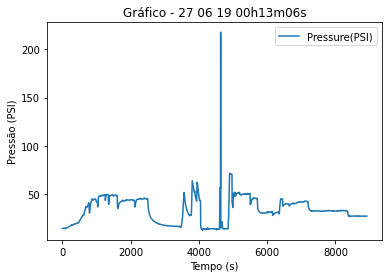

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-06-27--12h-12m-34s.csv


,Time(s),Pressure(PSI)
0,0.0,14.2440
1,1.0,14.2144
2,2.0,14.2132
3,3.0,14.2537
4,4.0,14.1967
...,...,...
1128,1128.0,16.4367
1129,1129.0,16.2557
1130,1130.0,16.1880
1131,1131.0,16.1024


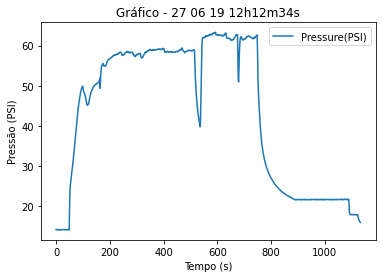

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-06-27--15h-31m-45s.csv


,Time(s),Pressure(PSI)
0,0.0,13.8056
1,1.0,13.8199
2,2.0,13.8533
3,3.0,13.8766
4,4.0,13.8879
...,...,...
5625,5625.0,14.4213
5626,5626.0,14.4433
5627,5627.0,14.4402
5628,5628.0,14.4385


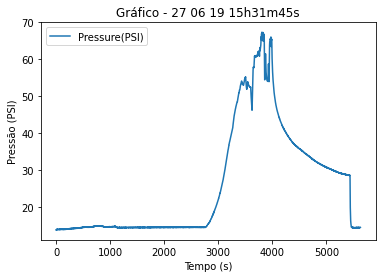

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-06-27--22h-08m-18s.csv


,Time(s),Pressure(PSI)
0,0.0,14.3615
1,1.0,14.3953
2,2.0,14.4050
3,3.0,14.3836
4,4.0,14.3743
...,...,...
6930,6930.0,14.5807
6931,6931.0,14.5726
6932,6932.0,14.6064
6933,6933.0,14.5827


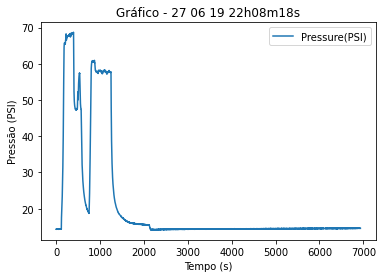

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-06-28--05h-59m-00s.csv


,Time(s),Pressure(PSI)
0,0.0,23.5457
1,1.0,23.7927
2,2.0,24.0471
3,3.0,24.2934
4,4.0,24.5886
...,...,...
250,250.0,57.0089
251,251.0,57.0273
252,252.0,57.0618
253,253.0,57.0177


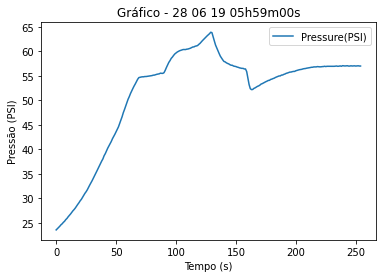

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-06-28--06h-04m-00s.csv


,Time(s),Pressure(PSI)
0,0.0,57.2586
1,1.0,57.2499
2,2.0,57.2571
3,3.0,57.2556
4,4.0,57.3301
...,...,...
1296,1296.0,14.4322
1297,1297.0,14.4029
1298,1298.0,14.4627
1299,1299.0,14.4056


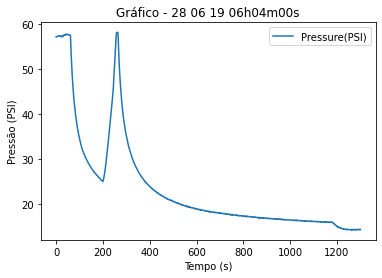

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-07-01--16h-53m-00s.csv


,Time(s),Pressure(PSI)
0,0.0,15.0082
1,1.0,14.9992
2,2.0,15.0670
3,3.0,15.0448
4,4.0,15.0392
...,...,...
58700,58700.0,25.1712
58701,58701.0,25.1939
58702,58702.0,25.2092
58703,58703.0,25.1761


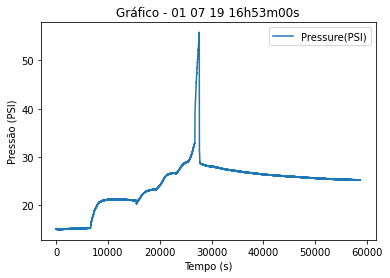

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-07-02--09h-11m-42s.csv


,Time(s),Pressure(PSI)
0,0.0,25.1551
1,1.0,25.1109
2,2.0,25.1971
3,3.0,25.1759
4,4.0,25.1721
...,...,...
23949,23949.0,28.0447
23950,23950.0,28.0315
23951,23951.0,28.0667
23952,23952.0,28.1263


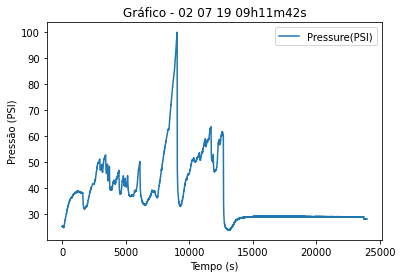

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-07-02--15h-55m-29s.csv


,Time(s),Pressure(PSI)
0,0.0,28.0702
1,1.0,28.1010
2,2.0,28.0551
3,3.0,28.0738
4,4.0,28.0224
...,...,...
525,525.0,36.4900
526,526.0,36.3820
527,527.0,36.2684
528,528.0,36.1549


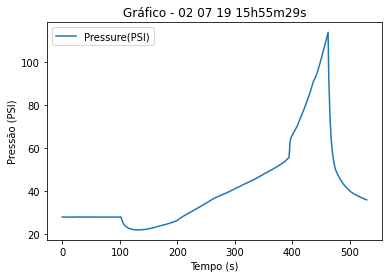

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-07-02--16h-11m-54s.csv


,Time(s),Pressure(PSI)
0,0.0,34.8936
1,1.0,35.0730
2,2.0,35.2820
3,3.0,35.4303
4,4.0,35.5823
...,...,...
12268,12268.0,21.3501
12269,12269.0,21.2181
12270,12270.0,21.1581
12271,12271.0,21.0911


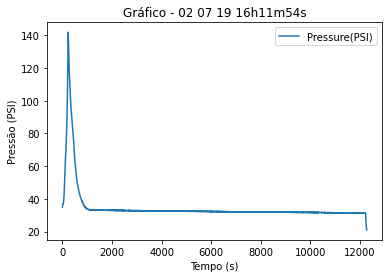

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-07-02--19h-36m-30s.csv


,Time(s),Pressure(PSI)
0,0.0,20.7413
1,1.0,20.6995
2,2.0,20.5865
3,3.0,20.5272
4,4.0,20.4673
...,...,...
11772,11772.0,24.5002
11773,11773.0,24.4445
11774,11774.0,24.3620
11775,11775.0,24.2430


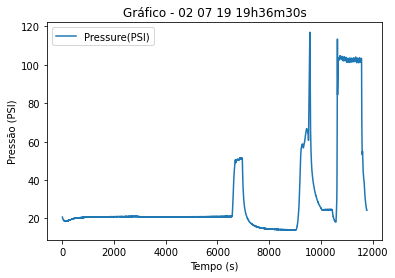

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


In [4]:
# Estabelece uma lista com o nome de todos os arquivos com anormalidades que desejamos analisar (excluindo aqueles fora do período contemplado pelas anotações da pesquisadora)
injecoes_anormalidades = ["Pressure-19-06-27--00h-13m-06s.csv", "Pressure-19-06-27--12h-12m-34s.csv", "Pressure-19-06-27--15h-31m-45s.csv", "Pressure-19-06-27--22h-08m-18s.csv", "Pressure-19-06-28--05h-59m-00s.csv", "Pressure-19-06-28--06h-04m-00s.csv", "Pressure-19-07-01--16h-53m-00s.csv", "Pressure-19-07-02--09h-11m-42s.csv", "Pressure-19-07-02--15h-55m-29s.csv", "Pressure-19-07-02--16h-11m-54s.csv", "Pressure-19-07-02--19h-36m-30s.csv"]

# Passamos cada um deles pela função grafico_pressao()
for arquivo in injecoes_anormalidades:
    grafico_pressao(arquivo)

Arquivo - Pressure-19-06-28--02h-58m-57s.csv


,Time(s),Pressure(PSI)
0,0.0,14.2833
1,1.0,14.3009
2,2.0,14.2720
3,3.0,14.3077
4,4.0,14.2939
...,...,...
9758,9758.0,14.1323
9759,9759.0,14.1892
9760,9760.0,14.1194
9761,9761.0,14.1256


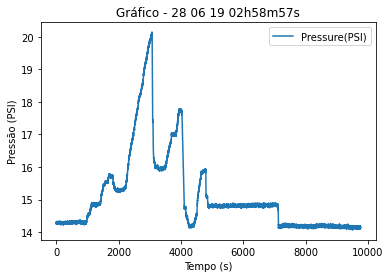

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-06-28--05h-59m-00s.csv


,Time(s),Pressure(PSI)
0,0.0,23.5457
1,1.0,23.7927
2,2.0,24.0471
3,3.0,24.2934
4,4.0,24.5886
...,...,...
250,250.0,57.0089
251,251.0,57.0273
252,252.0,57.0618
253,253.0,57.0177


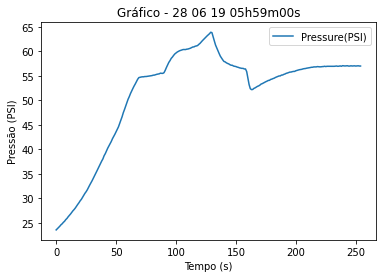

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-06-28--06h-04m-00s.csv


,Time(s),Pressure(PSI)
0,0.0,57.2586
1,1.0,57.2499
2,2.0,57.2571
3,3.0,57.2556
4,4.0,57.3301
...,...,...
1296,1296.0,14.4322
1297,1297.0,14.4029
1298,1298.0,14.4627
1299,1299.0,14.4056


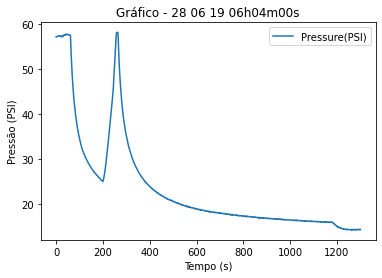

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-06-28--09h-16m-00s.csv


,Time(s),Pressure(PSI)
0,0.0,14.4239
1,1.0,14.4775
2,2.0,14.4452
3,3.0,14.4956
4,4.0,14.4495
...,...,...
3021,3021.0,17.9007
3022,3022.0,17.8582
3023,3023.0,17.9411
3024,3024.0,17.8821


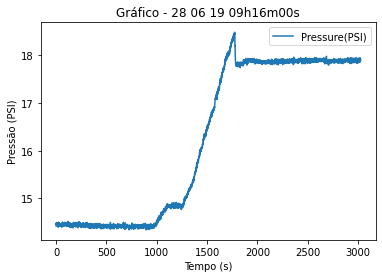

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-06-28--13h-14m-48s.csv


,Time(s),Pressure(PSI)
0,0.0,18.7938
1,1.0,18.8046
2,2.0,18.7710
3,3.0,18.8213
4,4.0,18.7876
...,...,...
21383,21383.0,27.7368
21384,21384.0,27.6406
21385,21385.0,27.6874
21386,21386.0,27.6469


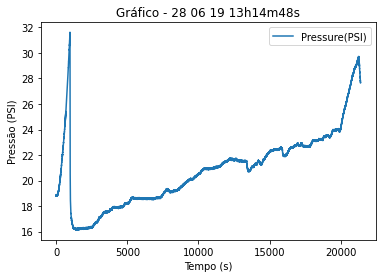

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 não


Arquivo - Pressure-19-07-01--16h-46m-00s.csv


,Time(s),Pressure(PSI)
0,0.0,18.5705
1,1.0,18.5955
2,2.0,18.5638
3,3.0,18.6035
4,4.0,18.5990
...,...,...
183,183.0,14.9972
184,184.0,15.0057
185,185.0,14.9989
186,186.0,15.0458


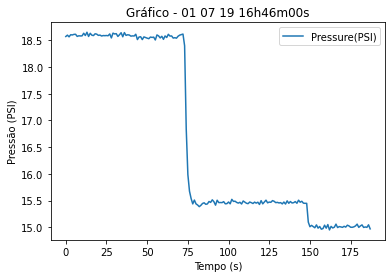

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 nã


Responda corretamente:


 não


Arquivo - Pressure-19-07-01--16h-53m-00s.csv


,Time(s),Pressure(PSI)
0,0.0,15.0082
1,1.0,14.9992
2,2.0,15.0670
3,3.0,15.0448
4,4.0,15.0392
...,...,...
58700,58700.0,25.1712
58701,58701.0,25.1939
58702,58702.0,25.2092
58703,58703.0,25.1761


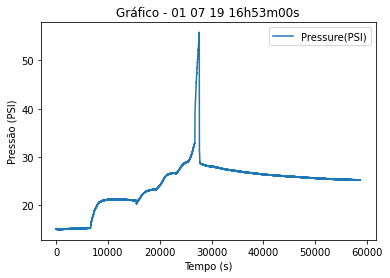

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 nao


Arquivo - Pressure-19-07-02--09h-11m-42s.csv


,Time(s),Pressure(PSI)
0,0.0,25.1551
1,1.0,25.1109
2,2.0,25.1971
3,3.0,25.1759
4,4.0,25.1721
...,...,...
23949,23949.0,28.0447
23950,23950.0,28.0315
23951,23951.0,28.0667
23952,23952.0,28.1263


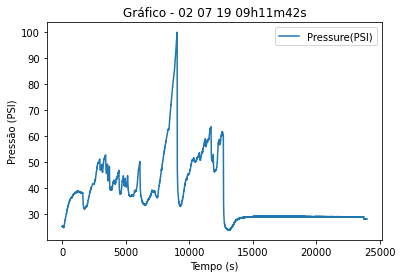

Deseja dar zoom em algum intervalo de tempo do experimento para ver melhor algum pico? (responda sim ou não)


 nao


In [5]:
# Estabelece uma lista com o nome de todos os arquivos referentes às injeções de permanganato
injecoes_permanganato = ["Pressure-19-06-28--02h-58m-57s.csv", "Pressure-19-06-28--05h-59m-00s.csv", "Pressure-19-06-28--06h-04m-00s.csv", "Pressure-19-06-28--09h-16m-00s.csv", "Pressure-19-06-28--13h-14m-48s.csv", "Pressure-19-07-01--16h-46m-00s.csv", "Pressure-19-07-01--16h-53m-00s.csv", "Pressure-19-07-02--09h-11m-42s.csv"]

# Passamos cada um deles pela função grafico_pressao()
for arquivo in injecoes_permanganato:
    grafico_pressao(arquivo)